<a href="https://colab.research.google.com/github/LuckyForoozan/MyProjects/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

Mounted at /content/drive
Original shape: (9623, 17)
Cleaned shape: (9623, 17)

Remaining missing values:

gender                     0
month                      0
year                       0
origin                     0
nursery_attendance         0
kindergarten_attendance    0
father_education           0
mother_education           0
father_occupation          0
mother_occupation          0
Region_Code                0
GeoArea_5                  0
ESCS_student               0
ESCS_class                 0
WLE_MATH_200               0
math_score_raw             0
math_score_percentile      0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 1200x600 with 0 Axes>

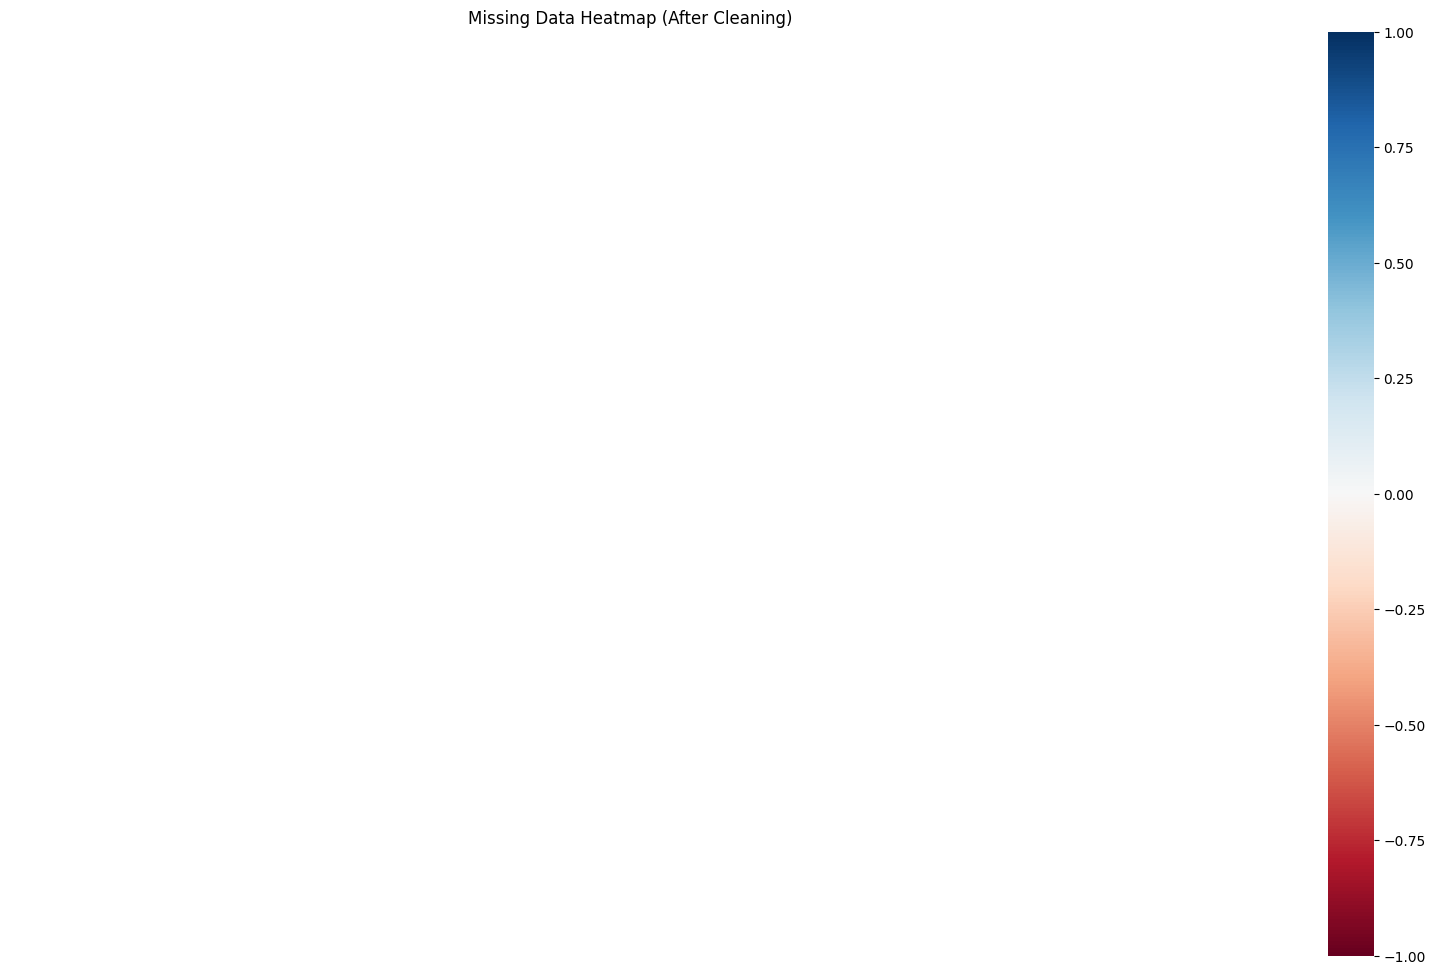


✅ Cleaned dataset with missing codes removed saved to Google Drive.


In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install missingno if needed
!pip install missingno
import missingno as msno

# 3. Load dataset
data_path = "/content/drive/MyDrive/INVALSI_data_MAT_2324(Foglio 1).csv"
df = pd.read_csv(data_path)

# 4. Define relevant columns
selected_columns = [
    "gender", "month", "year", "origin", "nursery_attendance", "kindergarten_attendance",
    "father_education", "mother_education", "father_occupation", "mother_occupation",
    "Region_Code", "GeoArea_5", "ESCS_student", "ESCS_class",
    "WLE_MATH_200", "math_score_raw", "math_score_percentile"
]

df = df[selected_columns].copy()

# 5. Remove rows with coded missing values
coded_missing = {
    "gender": [9],
    "month": [99],
    "year": [9],
    "origin": [9],
    "nursery_attendance": [9],
    "kindergarten_attendance": [9],
    "father_education": [99],
    "mother_education": [99],
    "father_occupation": [99],
    "mother_occupation": [99],
    # Optional: If GeoArea_5 has missing value codes (you can add it if needed)
}

# Remove coded missing values
for col, missing_vals in coded_missing.items():
    if col in df.columns:
        df = df[~df[col].isin(missing_vals)]

# 6. Drop NA (real missing)
df_clean = df.dropna()

# 7. Confirm cleaning
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print("\nRemaining missing values:\n")
print(df_clean.isnull().sum())

# 8. Visualize missing data
import seaborn as sns
plt.figure(figsize=(12,6))
msno.heatmap(df_clean)
plt.title("Missing Data Heatmap (After Cleaning)")
plt.show()

# 9. Save cleaned dataset
df_clean.to_csv("/content/drive/MyDrive/INVALSI_cleaned_filtered.csv", index=False)
print("\n✅ Cleaned dataset with missing codes removed saved to Google Drive.")


📦 Boxplots for Numerical Columns:


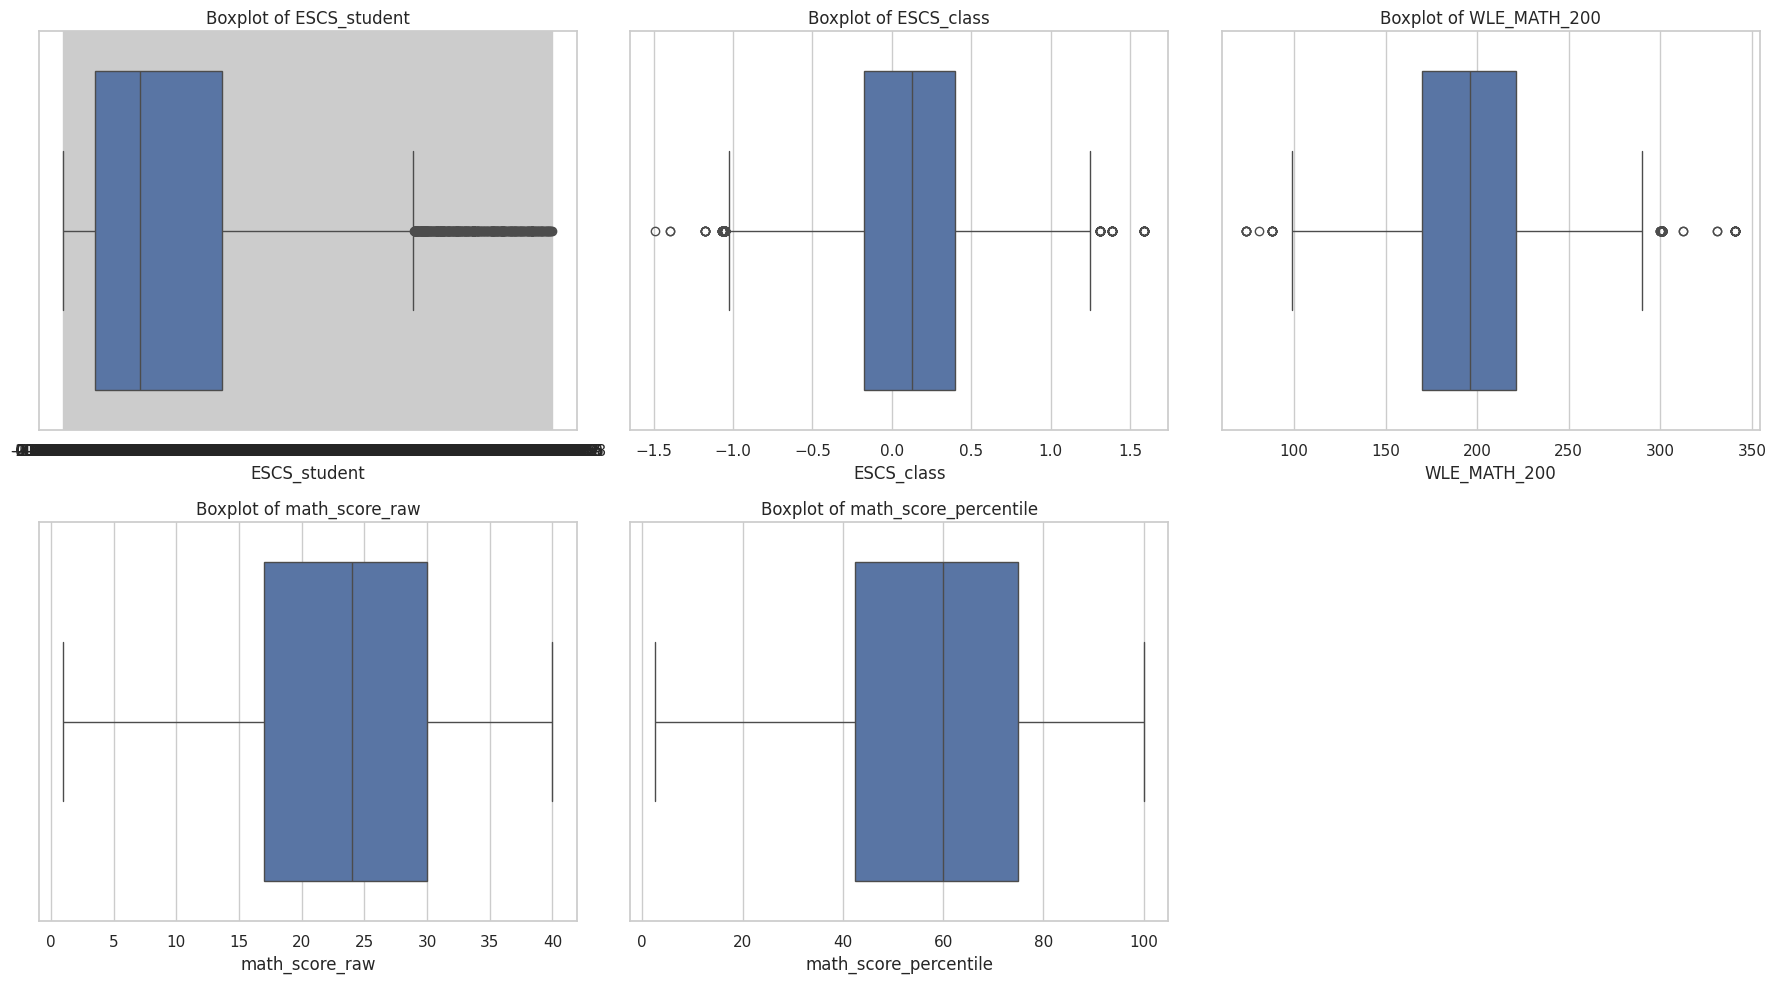


📊 Countplots for Categorical Columns:


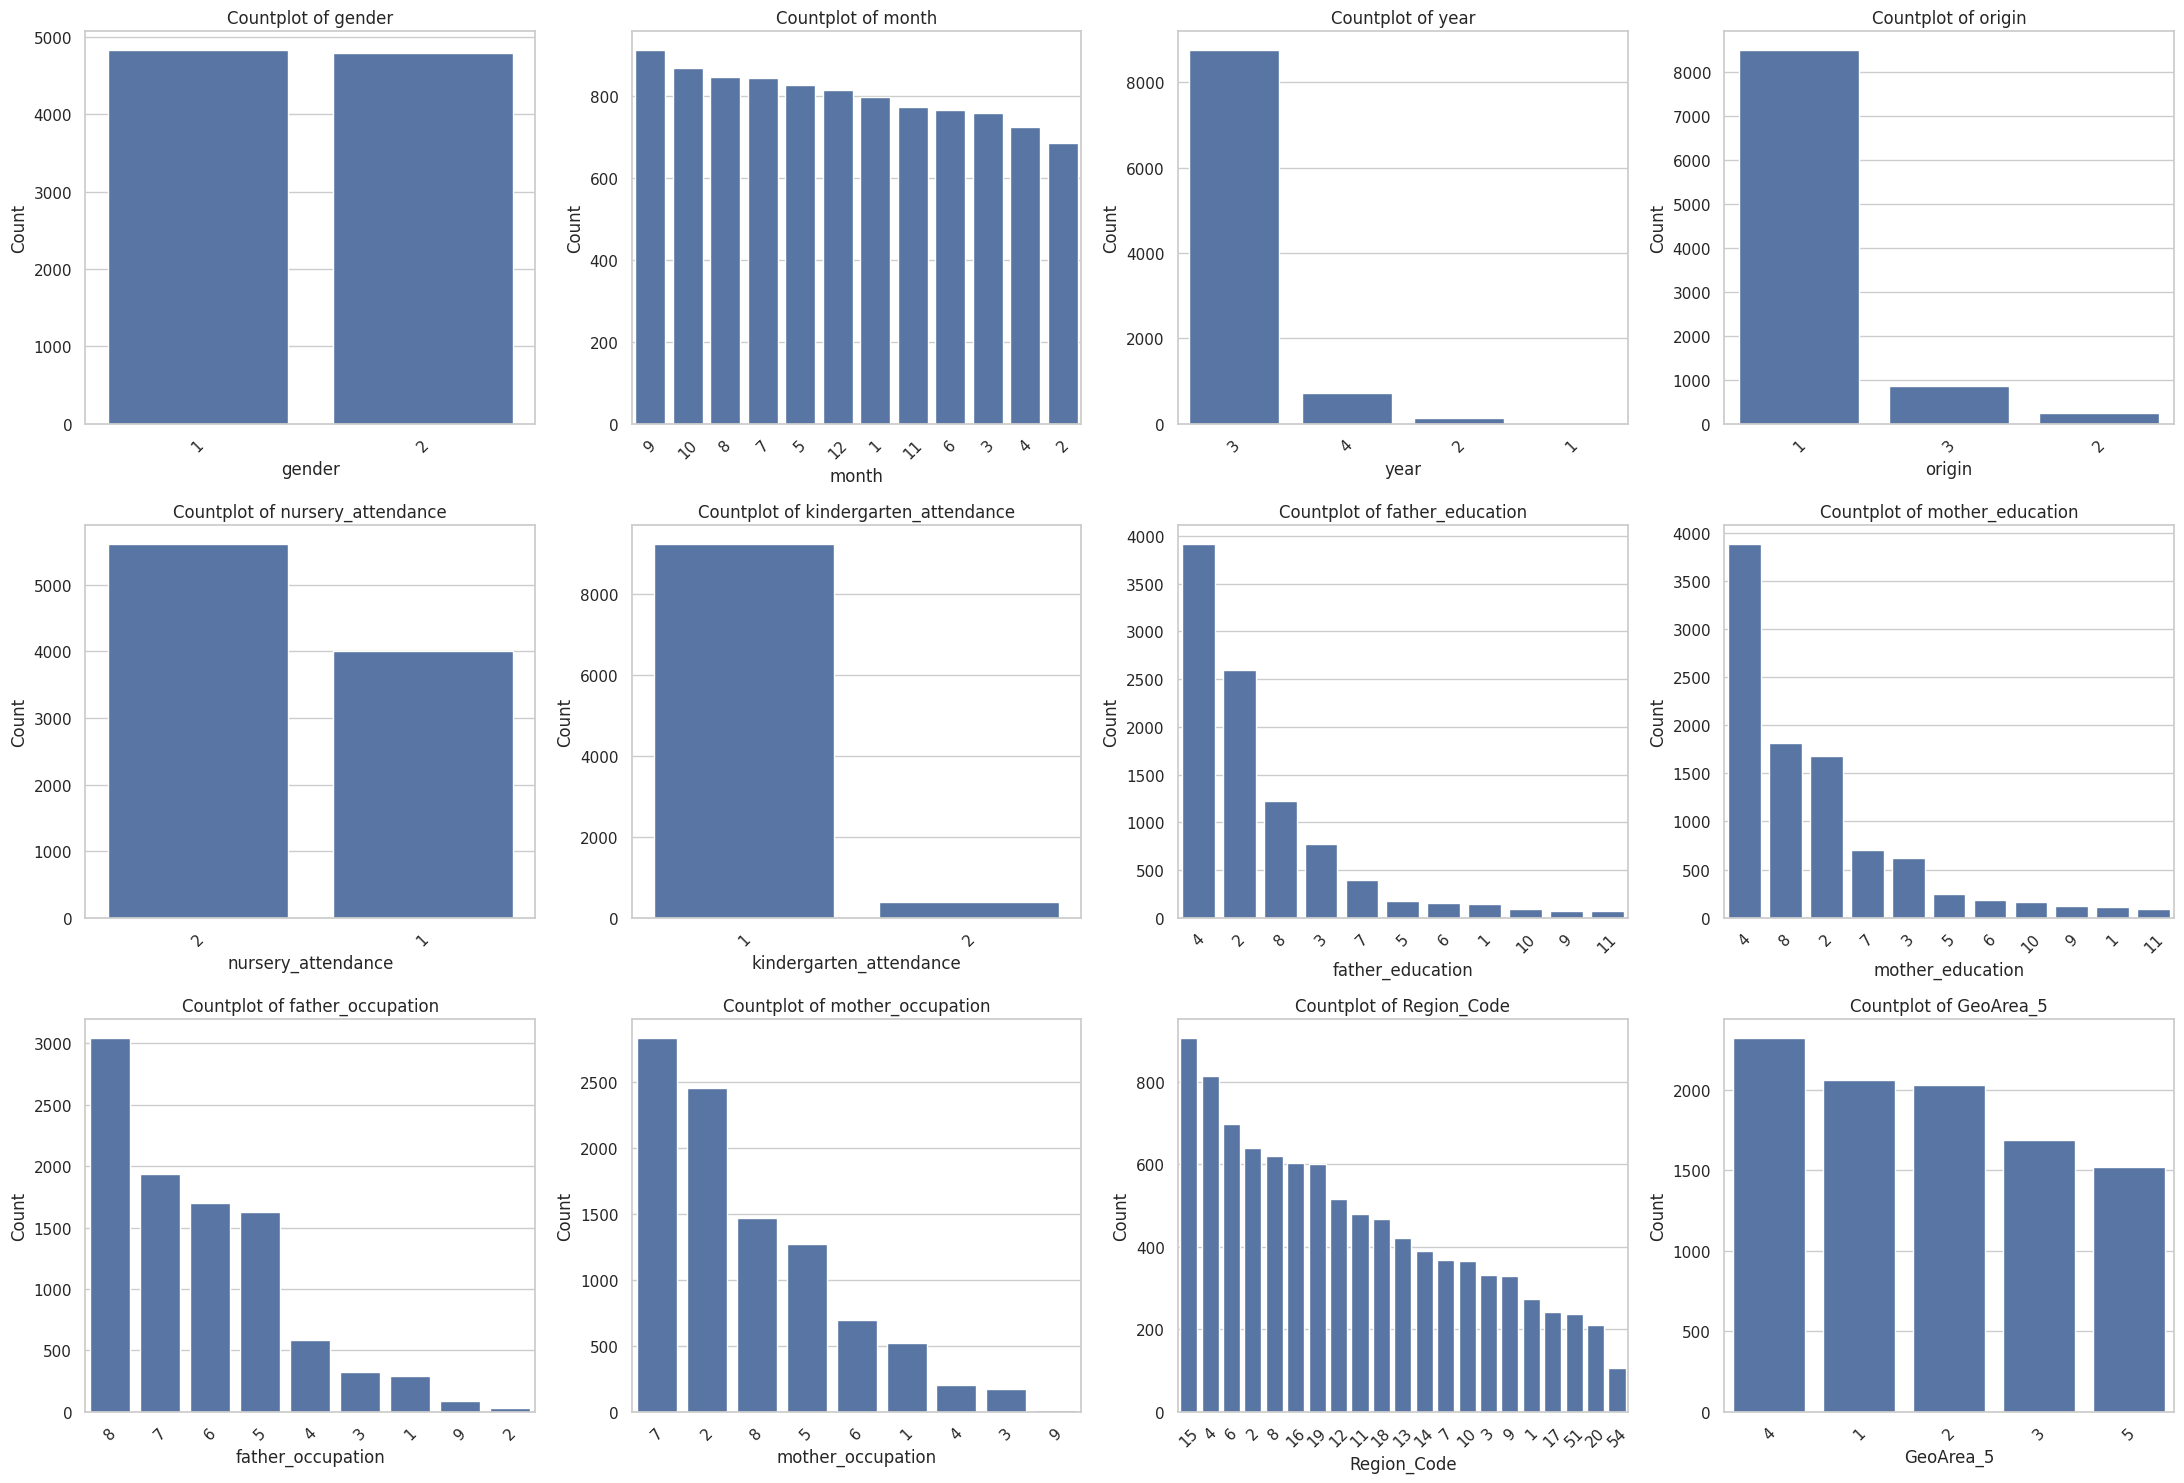

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Numerical columns
numerical_columns = [
    "ESCS_student", "ESCS_class",
    "WLE_MATH_200", "math_score_raw", "math_score_percentile"
]

# Categorical columns names
categorical_columns = [
    "gender", "month", "year", "origin", "nursery_attendance", "kindergarten_attendance",
    "father_education", "mother_education", "father_occupation", "mother_occupation",
    "Region_Code", "GeoArea_5"
]

# 📦 Boxplots (Numerical): 3x2 layout
print("\n📦 Boxplots for Numerical Columns:")
num_plots = len(numerical_columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 cols
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    if col in df_clean.columns:
        sns.boxplot(x=df_clean[col], ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_xlabel(col)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 📊 Countplots (Categorical): 4x3 layout
print("\n📊 Countplots for Categorical Columns:")
cat_plots = len(categorical_columns)
cols = 4
rows = -(-cat_plots // cols)  # ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(22, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if col in df_clean.columns:
        sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f"Countplot of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

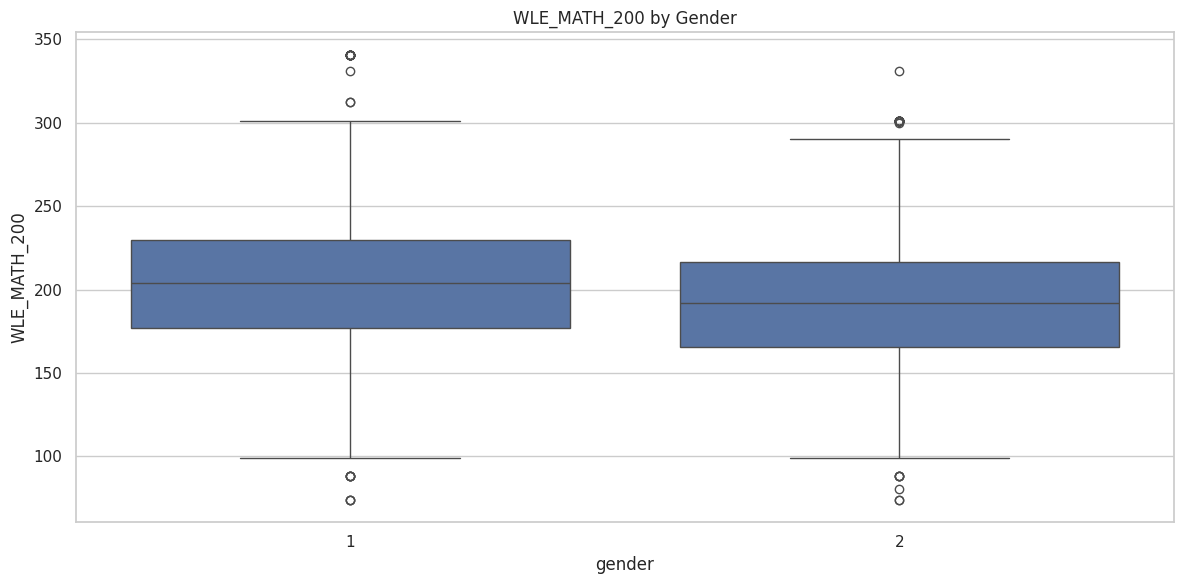

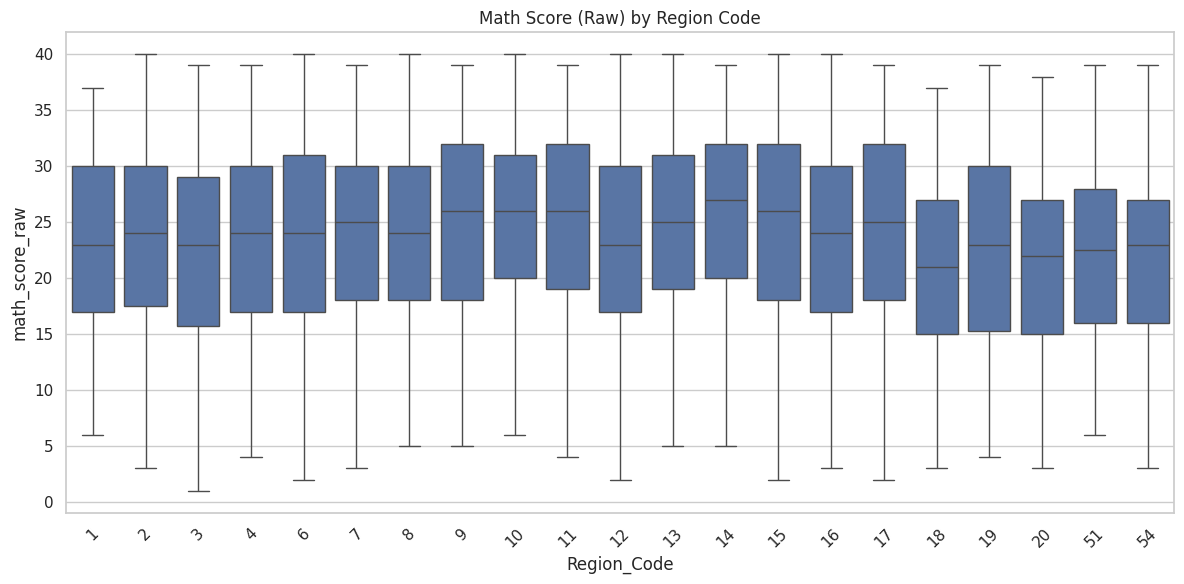

In [ ]:
#plotting boxplots
# C. Grouped Boxplot - e.g., WLE_MATH_200 by Gender
if "WLE_MATH_200" in df_clean.columns and "gender" in df_clean.columns:
    plt.figure()
    sns.boxplot(data=df_clean, x="gender", y="WLE_MATH_200")
    plt.title("WLE_MATH_200 by Gender")
    plt.tight_layout()
    plt.show()

# D. Boxplot of math_score_raw by Region
if "math_score_raw" in df_clean.columns and "Region_Code" in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_clean, x="Region_Code", y="math_score_raw")
    plt.title("Math Score (Raw) by Region Code")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Modeling**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert categorical variables to category dtype
df_clean["Region_Code"] = df_clean["Region_Code"].astype("category")
df_clean["gender"] = df_clean["gender"].astype("category")
df_clean["origin"] = df_clean["origin"].astype("category")
df_clean["GeoArea_5"] = df_clean["GeoArea_5"].astype("category")

# Fit multilevel linear model with random intercepts by Region_Code
model = smf.mixedlm(
    "WLE_MATH_200 ~ gender + origin + ESCS_student + father_education + mother_education + father_occupation + mother_occupation + nursery_attendance + kindergarten_attendance",
    df_clean,
    groups=df_clean["Region_Code"]
)
result = model.fit()

# Summary of model
print(result.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       WLE_MATH_200
No. Observations:       9623          Method:                   REML        
No. Groups:             21            Scale:                    1200.2270   
Min. group size:        105           Log-Likelihood:           -45761.0648 
Max. group size:        907           Converged:                Yes         
Mean group size:        458.2                                               
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|  [0.025   0.975]
----------------------------------------------------------------------------
Intercept                    153.965   16.027   9.606 0.000  122.552 185.378
gender[T.2]                  -10.672    0.728 -14.650 0.000  -12.100  -9.244
origin[T.2]                   -8.917    2.544  -3.505 0.000  -13.904  -3.931
origin[T.3]        

In [ ]:
# Variance explained by regions
var_components = result.cov_re
print("\nRandom Effect Variance (Region):")
print(var_components)

# Residual variance
print("\nResidual Variance:")
print(result.scale)

# Intraclass Correlation Coefficient (ICC)
icc = var_components.values[0][0] / (var_components.values[0][0] + result.scale)
print(f"\nIntraclass Correlation Coefficient (ICC): {icc:.3f}")


Random Effect Variance (Region):
           Group
Group  32.166279

Residual Variance:
1200.2269842519097

Intraclass Correlation Coefficient (ICC): 0.026


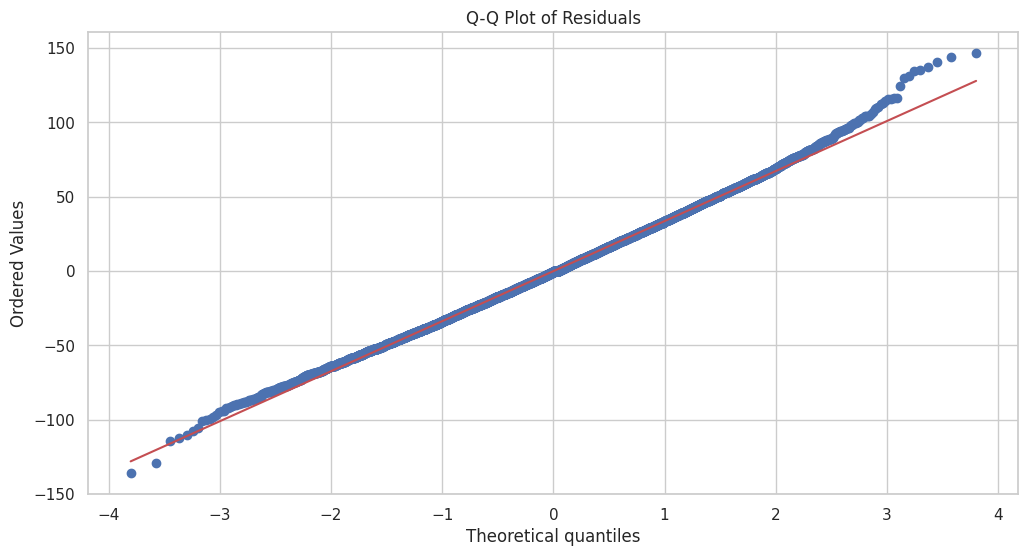

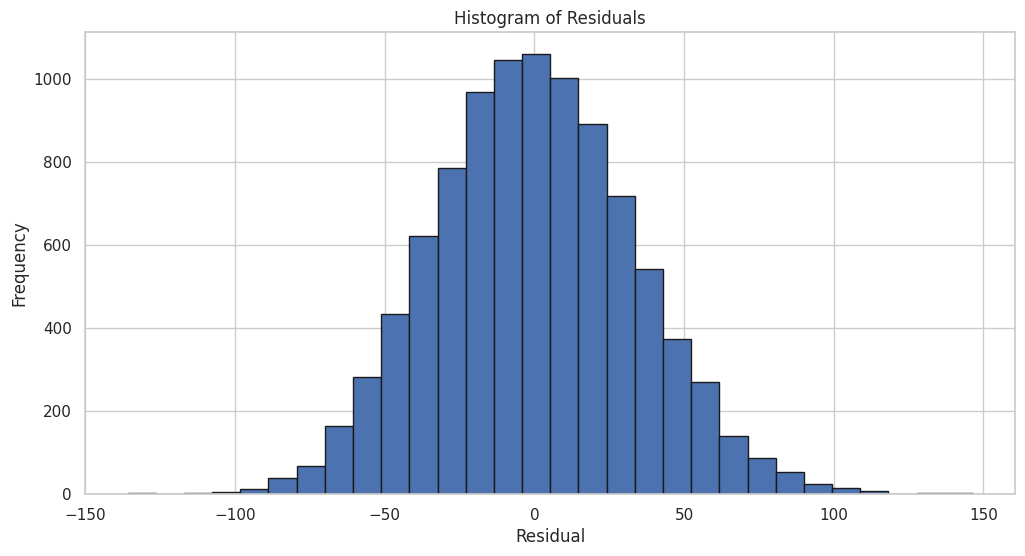

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = result.resid

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()